# Homework 2: **Bayesian** *regression* and *classification*, ***Gaussian Processes*** (part 1)

Probabilistic Machine Learning -- Spring 2023, UniTS

<a target="_blank" href="https://colab.research.google.com/github/emaballarin/probml-units/blob/main/homework-2023/02_bayesian_reg_class_gps_HW.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

### Exercise 1 (theory: *Bayesian conjugate modelling*)

Consider the Gamma distribution $\text{Gamma}(\alpha, \beta)$ with p.d.f. $\frac{\beta^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x}$, and the Poisson distribution $\text{Poisson}(\lambda)$ with p.m.f. $\frac{\lambda^k e^{-\lambda}}{k!}.$

Given the model
$$
    \begin{align*}
    \lambda &\sim \text{Gamma}(\alpha, \beta)\\
    x &\sim \text{Poisson}(\lambda)
    \end{align*}
$$
prove that the Gamma distribution is a conjugate prior for the Poisson likelihood (for the given model).

#### solution

We have the prior
$$
P\left(\lambda\right) = \frac{\beta^\alpha}{\Gamma\left(\alpha\right)} \lambda^{\alpha-1}e^{-\beta\lambda},
$$
and the likelihood (for $n$ observations)
$$
P\left(x_1,...,x_n|\lambda\right) = \prod_{i=1}^{n}\frac{\lambda^{x_i}e^{-\lambda}}{x_i!}.
$$

To prove that the Gamma distribution is a conjugate prior for the likelihood, we have to show that the posterior distribution is of the same family as the Gamma. From the Bayes theorem we know that the posterior is given by (we neglect all constants, i.e. terms that do not contain $\lambda$, since they are not necessary to understand the family of the distribution):
$$
P\left(\lambda|x\right) \propto P\left(\lambda\right)P\left(x|\lambda\right) \propto \lambda^{\alpha-1}e^{-\beta\lambda} \prod_{i=1}^{n}\lambda^{x_i}e^{-\lambda} = \lambda^{\alpha-1+\sum_{i=1}^{n}x_i}e^{-\left(\beta+n\right)\lambda}.
$$

As we can see, the posterior is still a Gamma distribution with new parameters $\alpha'=\alpha+\sum_{i=1}^{n}x$ and $\beta'=\beta+n$.

### Exercise 2 (practicum: *`sklearn`, Naive Bayes*)

The *Wine* dataset is a classic *toy dataset* for classification tasks. It contains 178 samples of 3 different types of wine (encoded with a sequantial integer), with 13 continuous numeric features each. The goal is to (learn to) predict the type of an unknown wine (of any of those 3 types), given its specific features.

It can be easily imported from `sklearn` as:

```python
from sklearn.datasets import load_wine
... = load_wine()
```

Trying to use the `sklearn` interface as much as possible (no not *re-invent the wheel*!):

1. Split the dataset into a training and a test set (*hint:* use the `train_test_split` function), with the test split approximately $1/3^\text{rd}$ of the available data. Ensure that both sets are adequately representative of the problem at hand!

2. Fit a `LogisticRegression` model on the *training* split, and try to predict the labels from (just) the numeric features of the *test* split (*note:* we are not dealing with a *Bayesian* classifier yet; that will require - apart from theoretical knowledge, which you should already have! - sufficient experience with a Bayesian statistical modelling library, *e.g.* [Pyro](https://pyro.ai/), which will be introduced to you soon!)

3. Evaluate the performance of the model on the *test* split.

4. Fit a `GaussianNB` (*Naive Bayes classifier*) model on the *training* split, and try to predict the labels from (just) the numeric features of the *test* split. Evaluate the performance of the model on the *test* split.

5. Compare the performance of the two models according to a suitable metric and briefly comment.

In [143]:
# importing needed modules
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
# importing the dataet
raw_wine = load_wine()
wine = pd.DataFrame(data=raw_wine.data, columns=raw_wine.feature_names)
targ_wine = pd.Series(data=raw_wine.target, name='wine_type')
wine = pd.concat([wine, targ_wine], axis = 1)

In [145]:
display(wine)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [146]:
# splitting data in train and test set (the function performs shuffling internally, so that the
# both train and test sets are representative of the problem)
X_train, X_test, y_train, y_test = train_test_split(raw_wine['data'], raw_wine['target'],
                                                     test_size=0.33)

In [147]:
# fitting a logistic regression model (we use the one-versus-rest strategy to address multiclass
# classification)
wine_lm = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
wine_lm.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [148]:
# prediction
wine_lm.predict(X_test)

array([1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 0, 2, 0, 1, 0, 1, 1, 2, 1, 2, 1, 2, 2, 0])

In [149]:
# testing the model (we use mean subset accuracy)
wine_lm.score(X_test, y_test)

0.9322033898305084

In [150]:
# fitting the Gaussian naive bayes model
wine_gm = GaussianNB()
wine_gm.fit(X_train, y_train)

GaussianNB()

In [151]:
# prediction
wine_gm.predict(X_test)

array([1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 0])

In [152]:
# testing the model (again we use mean subset accuracy)
wine_gm.score(X_test, y_test)

0.9322033898305084

#### conclusions
Looking at the accuracy score of the two models we can see that they both have a very strong predictive capability. In fact, especially considering that the dataset is not very large, the accuracy we got is pretty high.

After refitting and testing models several times we conclude that none of the two models (logistic regression and Gaussian naive bayes) can be considered better than the other.

### Exercise 3 (practicum: *`sklearn`, Gaussian Process regression fitting*)

The *Mauna Loa Carbon Dioxide* dataset is another *toy* dataset, this time for **regression tasks** (specifically *time series* regression and prediction). It contains the raw recordings of atmospheric $CO_2$ concentration (in parts per million) at the Mauna Loa Observatory in Hawaii, in some days between 1958 and 2001. The goal is to (learn to) predict the $CO_2$ concentration at a given time, given the previous measurements.

By using some clever `sklearn` utilities, it can be easily imported as:

```python
from sklearn.datasets import fetch_openml
... = fetch_openml(data_id=41187, as_frame=True, parser="pandas")
```

On the resulting dataset, perform the following preprocessing steps (in `pandas`):

1. Drop from the dataset all the columns with data other than time information (if you want to convert time information to proper dates, you can use the `pandas.to_datetime` function; but that;s up to you!) and the actual carbon dioxide concentration (`co2`).

2. Compute monthly averages of the `co2` column and remove from the dataframe all resulting rows (*i.e.* months with no measurements al all).

In [153]:
# importing dataset as a daframe
from sklearn.datasets import fetch_openml
raw_mauna_loa = fetch_openml(data_id=41187, as_frame=True, parser="pandas")
mauna_loa = raw_mauna_loa.frame

In [154]:
display(mauna_loa)

,year,month,day,weight,flag,station,co2
0,1958,3,29,4,0,MLO,316.1
1,1958,4,5,6,0,MLO,317.3
2,1958,4,12,4,0,MLO,317.6
3,1958,4,19,6,0,MLO,317.5
4,1958,4,26,2,0,MLO,316.4
...,...,...,...,...,...,...,...
2220,2001,12,1,7,0,MLO,370.3
2221,2001,12,8,7,0,MLO,370.8
2222,2001,12,15,7,0,MLO,371.2
2223,2001,12,22,6,0,MLO,371.3


In [155]:
# dropping non time or CO2 information
mauna_loa_time = mauna_loa.drop(axis=1, labels=['weight', 'flag', 'station'])

In [156]:
# computing monthly CO2 mean: we drop day information (not useful), then group by year, then group
# by month and finally compute the mean (possible lines with NA's values are dropped by default by
# groupby())
mauna_loa_monthly = mauna_loa_time.drop(axis=1, labels='day').groupby(['year', 'month']).mean()
display(mauna_loa_monthly)

co2
year month            
1958 3      316.100000
     4      317.200000
     5      317.433333
     7      315.625000
     8      314.950000
...                ...
2001 8      369.425000
     9      367.880000
     10     368.050000
     11     369.375000
     12     371.020000

[521 rows x 1 columns]

Exploiting the contents of `sklearn.gaussian_process.kernels`, design an adequate kernel for the (predictive) regression task at hand, and fit a `GaussianProcessRegressor` model on a *training* split (which you need to define from original data, approximately 0.85 of the whole dataset), and try to predict the labels from (just) the numeric features of the *test* split. Evaluate the performance of the model on the remaining *test* split.

Notice that the task has been already solved (many!) times before (and such solutions may be available online!). The point of the exercise is to gain some experience with the `sklearn` interface for Gaussian Processes regression, and to get a feel for the kind of effects modelled by different choices of kernel (not to get perfect results!).

If you want to try (and show!) different possible solutions, feel free to do it. You may discover some potentially interesting phenomena!

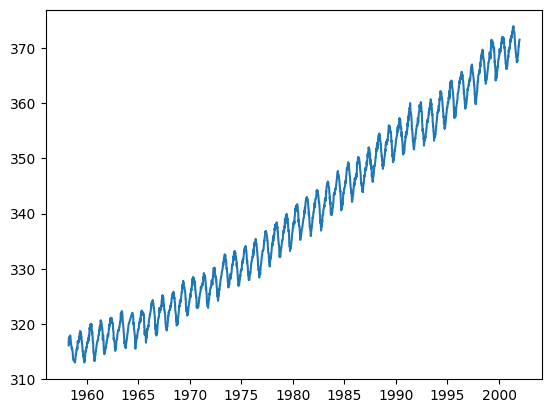

In [157]:
# plotting co2 values as functions of time (we use the function pandas.to_datetime to get a
# 'sequential' time) to spot possible patterns
_ = plt.plot(pd.to_datetime(mauna_loa.drop(axis=1, labels=['weight', 'flag', 'station', 'co2'])),
             mauna_loa['co2'])
plt.show()

We can observe an overall increase in co2 during years and also a seasonal cycle

In [158]:
# building a new dataframe with monthly means to fit the model: we use monthly means to preserve the
# seasonal variations without having to deal with the different number of days in different months

mauna_loa_time.dropna(inplace=True)
min_year = mauna_loa['year'].min()

temp_dict = {'time': [], 'co2': []}

for year in pd.unique(mauna_loa_time['year']):
    for month in pd.unique(mauna_loa_time[mauna_loa_time['year']==year]['month']):
        temp_dict['time'].append((year-min_year)*12 + month)
        temp_dict['co2'].append(mauna_loa_monthly['co2'][year][month])

mauna_loa_data = pd.DataFrame(data=temp_dict)
display(mauna_loa_data)

,time,co2
0,3,316.100000
1,4,317.200000
2,5,317.433333
3,7,315.625000
4,8,314.950000
...,...,...
516,524,369.425000
517,525,367.880000
518,526,368.050000
519,527,369.375000


In [159]:
# splitting data in train/test
X_train, X_test, y_train, y_test = train_test_split(mauna_loa_data['time'], mauna_loa_data['co2'],
                                                    test_size=0.15)
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [160]:
# designing the kernel: we use the widely used radial basis function kernel to model the
# 'interaction' among neighbor observations and the exp-sine-squared kernel to model the seasonal
# periodicity (evident from the previous plot); we fix the periodicity of the latter to 12 (months)

from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ExpSineSquared

kernel_function = RBF(length_scale=100) * ExpSineSquared(length_scale=1, periodicity=12, periodicity_bounds="fixed", length_scale_bounds=(1e-30, 1e10))

In [161]:
# fitting the model
gaussian_model = GPR(kernel=kernel_function)
gaussian_model.fit(X_train, y_train)

/home/tommy/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/tommy/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-30. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=RBF(length_scale=100) * ExpSineSquared(length_scale=1, periodicity=12))

In [162]:
# testing the model (the metric is R^2)
gaussian_model.score(X_test, y_test)

-532.242943582554

As we can see from the $R^2$ score, the model is very bad. We can try to modify the kernel and refit it, for example incrementing the kernel 'module'

In [163]:
kernel_function *= 1000
gaussian_model = GPR(kernel=kernel_function)
gaussian_model.fit(X_train, y_train)

/home/tommy/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/tommy/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-30. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/tommy/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=RBF(length_scale=100) * ExpSineSquared(length_scale=1, periodicity=12) * 31.6**2)

In [164]:
# testing the new model
gaussian_model.score(X_test, y_test)

-532.242943582554

Nothing changes. Let's try to add to the kernel a component to model irregularities

In [165]:
from sklearn.gaussian_process.kernels import RationalQuadratic

kernel_function += 0.2*RationalQuadratic(length_scale=1.0, alpha=1.0)
gaussian_model = GPR(kernel=kernel_function)
gaussian_model.fit(X_train, y_train)

GaussianProcessRegressor(kernel=RBF(length_scale=100) * ExpSineSquared(length_scale=1, periodicity=12) * 31.6**2 + 0.447**2 * RationalQuadratic(alpha=1, length_scale=1))

In [166]:
# testing the new model
gaussian_model.score(X_test, y_test)

0.9994900983176197

We can see that with this simple add we got a great improvement in the $R^2$ score (the maximum value is 1)

**OPTIONAL:**  
Try to fit the model on the whole dataset and predict values of carbon dioxide concentration until today. Does the model capture the features of the time series well enough?

/home/tommy/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__alpha is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


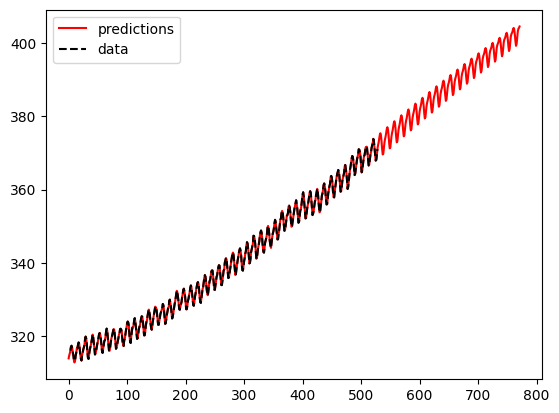

In [178]:
# fitting the model on all data
big_gaussian_model = GPR(kernel=kernel_function)
big_gaussian_model.fit(np.array(mauna_loa_data['time']).reshape(-1, 1),
                       np.array(mauna_loa_data['co2']).reshape(-1, 1))

# predicting future values
X_predict = np.arange(0, (2022-min_year)*12+4, 1).reshape(-1, 1)
y_predict = big_gaussian_model.predict(X_predict).reshape(-1, 1)

# inspecting predictions by plot
_ = plt.plot(X_predict, y_predict, color="red", label="predictions")
_ = plt.plot(np.array(mauna_loa_data['time']), np.array(mauna_loa_data['co2']), color="black", linestyle="dashed", label="data")
plt.legend()
plt.show()

The model seems to capture both the growing with time and the seasonal cycle trends of the original data. Obviously, only an empirical measurement of data of the unobserved years could tell us if the model was actually able to predict them.

### Exercise 4 (practicum: `sklearn`, Gaussian Process classification fitting; potentially requiring theory *to-be-covered*)

Consider an instance of the *Circles* dataset, yet another *toy* dataset for classification featuring two concentric elliptical annuli. For the sake of simplicity, it has been already be generated and plotted for you:

In [180]:
from sklearn.datasets import make_circles

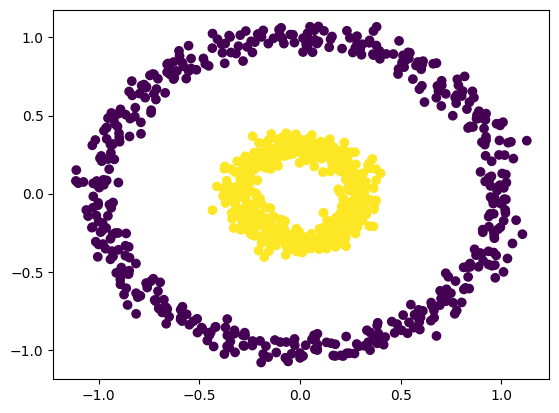

In [181]:
x, y = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=0)
_ = plt.scatter(x[:, 0], x[:, 1], c=y)

`sklearn`'s `GaussianProcessClassifier` approximates the non-Gaussian posterior by a Gaussian approximated through Laplace's saddle-point approximation.

Define an RBF kernel (*hint*: there's a `sklearn.gaussian_process.kernels.RBF` function just for that!) with lenghtscale parameter $l = 1$ and fit a Gaussian Process classifier to the observed data $(x,y)$ from *Circles* right above.

In [190]:
from sklearn.gaussian_process import GaussianProcessClassifier as GPC

kernel_function = RBF(length_scale=1)
circles_model = GPC(kernel=kernel_function)
circles_model.fit(x, y)

GaussianProcessClassifier(kernel=RBF(length_scale=1))

The functions that follow, evaluate and plot the posterior predictive mean function over a finite grid of points. Most importantly, the `plot_sklearn_predictions` function requires as arguments the learned GP classifier `sklearn_gp_classifier`, the observed points `x` and their labels `y`.

In [191]:
def meshgrid(x, n, eps=0.1):
    x0, x1 = np.meshgrid(
        np.linspace(x[:, 0].min() - eps, x[:, 0].max() + eps, n),
        np.linspace(x[:, 1].min() - eps, x[:, 1].max() + eps, n),
    )
    x_grid = np.stack([x0.ravel(), x1.ravel()], axis=-1)
    return x0, x1, x_grid


def plot_sklearn_predictions(sklearn_gp_classifier, x, y):
    x0, x1, x_grid = meshgrid(x, 30)

    preds = sklearn_gp_classifier.predict_proba(x_grid)

    _ = plt.figure(figsize=(10, 6))
    _ = plt.contourf(x0, x1, preds[:, 0].reshape(x0.shape), 101, vmin=0, vmax=1)
    _ = plt.contourf(x0, x1, preds[:, 1].reshape(x0.shape), 101, vmin=0, vmax=1)

    _ = plt.title("Posterior Mean")
    _ = plt.xticks([])
    _ = plt.yticks([])
    _ = plt.colorbar()
    _ = plt.scatter(x[:, 0], x[:, 1], c=y)

Plot the posterior predictive mean function and the training data, and comment.

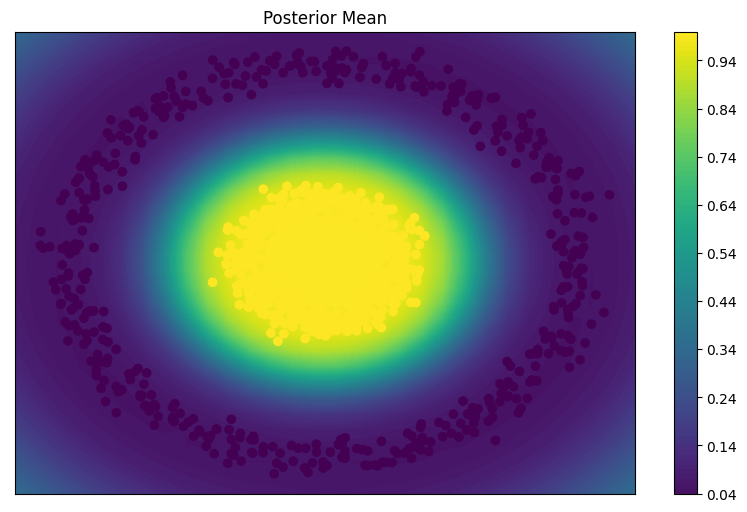

In [192]:
plot_sklearn_predictions(circles_model, x, y)

#### comments

We can see that the predictive mean goes gradually from intense yellow in the center of the inner ellipse to dark blue on the outer ellipse. The tonality indicates the degree of uncertainty in classification: green and light blue indicate the most uncertain classification 'zones'; this zones are the one between the two ellipses, which is uncertain because it hosts points that are roughly equally far from points of both classes, and the extreme corners of the figure, since its points are probably too far from any class points to be confidently classified.

In this example the role of the kernel as a measure of distance among points is pretty evident: as we just pointed out, nearest data points have a larger weight in classification of a certain point. In particular, the RBF kernel seems to be perfect for this case study, since data points classification seems to depend (not exactly, since they are not perfect circles) on their radial distance from the center of the figure.

However, it could be (**just my speculation**) that points that are internal to the inner ellipse are classified too confidently as yellow (notice that inside the inner ellipse the tonality of yellow is exactly the same as data points). This could be the case due to the fact that the RBF kernel could emphatize the effect of data points surrounding a certain spot (notice also that no area at all has the same tonality as blue data points).

### Not-an-exercise 5 (*Kernels? Why bother?*)

The following *task* is completely optional and up to your personal curiosity (and also a result of *my own* curiosity 🙃). It will be in no way considered for evaluation-related purposes: it may lead to interesting discussions though (or exam projects? and beyond? who knows!).

If you have never had the occasion to, watch this [brief talk by Ali Rahimi](https://www.youtube.com/watch?v=ORHFOnaEzPc), given in occasion of the 2018 *NeurIPS Test of Time award* (awarded his co-authored 2007 paper with Ben Recht ["Random Features for Large-Scale Kernel Machines"](https://people.eecs.berkeley.edu/~brecht/papers/07.rah.rec.nips.pdf)).

If you have some comments about it, feel free to write or voice them!